# Defining the dataframe

In [1]:
import csv
import pandas as pd
from datetime import datetime
import postpatch_funcs as pf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white', color_codes = True)
%matplotlib inline

In [2]:
initial = pd.read_csv('C:/users/lindsayn/documents/stash/ps-metadata-analysis/data/patch_seq_log_mouse.csv')

In [3]:
ps = initial.loc[:,["User","Date", "Post patch?", "Post patch pipette R", "Internal version", "PCR cycles", "SM_QC_PF", "Resolution index", "Res index pctl.", "Bad dates"]]
ps.dropna(subset = ["Post patch?"], inplace = True)
ps["Date"] = pd.to_datetime(ps["Date"], format = '%y%m%d', errors = 'coerce')
ps.dropna(subset = ["Resolution index"], inplace=True)
ps = ps[ps["PCR cycles"] == 21]
ps = pf.postpatch_reclass(ps)

postpatch_funcs.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  oo['post patch class'] = 'Outside out'
postpatch_funcs.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  nu['post patch class'] = 'Nucleated'
postpatch_funcs.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  ns['post patch class'] = 'No seal'
p

In [4]:
ps.head()

,User,Date,Post patch?,Post patch pipette R,Internal version,PCR cycles,SM_QC_PF,Resolution index,Res index pctl.,Bad dates,post patch class
1637,P2,2017-04-19,Nucleated,NaN,AiV2,21.0,pass,0.637763,30.0,NaN,Nucleated
1639,P2,2017-04-19,Nucleated,NaN,AiV2,21.0,pass,0.584635,25.0,NaN,Nucleated
1654,P1,2017-04-20,Nucleated,NaN,AiV2,21.0,pass,0.655187,30.0,NaN,Nucleated
1675,P2,2017-04-20,Nucleated,NaN,AiV2,21.0,pass,1.000000,100.0,NaN,Nucleated
1688,P1,2017-04-21,Nucleated,NaN,AiV2,21.0,pass,0.787968,46.0,NaN,Nucleated


# Plotting resolution index vs post patch outcome

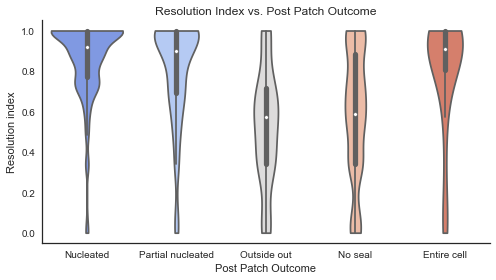

In [5]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 4)
sns.violinplot(x="post patch class", y="Resolution index", data=ps, inner='box', cut =0, scale='area', palette="coolwarm", ax=ax)
sns.despine()
plt.title("Resolution Index vs. Post Patch Outcome")
plt.xlabel("Post Patch Outcome")
plt.tight_layout()
plt.savefig("C:/users/lindsayn/documents/stash/ps-metadata-analysis/figures/RI_plot",dpi=300)

# Plotting resolution index over time

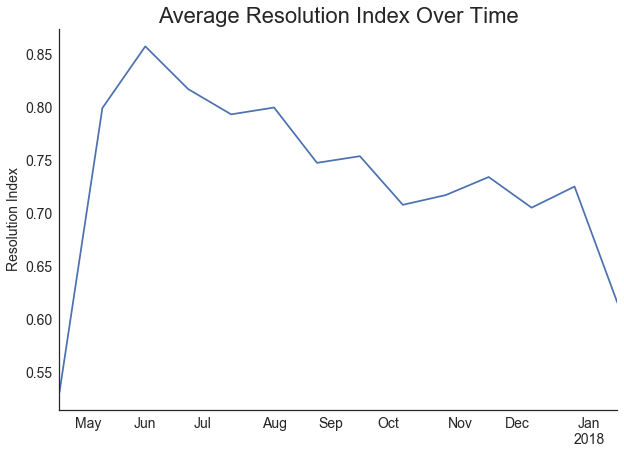

In [6]:
ps.set_index("Date", inplace=True)
ps2 = ps.groupby(pd.TimeGrouper(freq="3W"))["Resolution index"].mean()
ps2.plot(figsize=(10,7), fontsize= 14)
plt.title("Average Resolution Index Over Time", fontsize= 22, loc = "center")
plt.ylabel("Resolution Index", fontsize= 14)
plt.xlabel("")
sns.despine()
plt.savefig("C:/users/lindsayn/documents/stash/ps-metadata-analysis/figures/resolution_index_over_time")